In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Generating Dataset

In [103]:

rng=np.random.RandomState(10)
x=2*rng.rand(60)
y=5+2*x+rng.randn(60)
m=x.shape[0] 
np.sum(x)





60.79896461836406

### Plot of Dataset

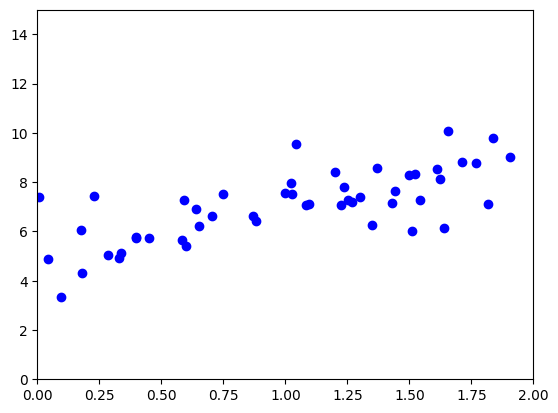

In [85]:
plt.plot(x,y,"bo")
plt.xlim(0,2)
plt.ylim(0,15)
plt.show()

### Cost Function 1 for Linear Regression


In [86]:
def cost1(x_out,x):
    cf1=(abs((x-x_out))**3)/2
    l1=cf1.mean()
    return l1

### Cost function 2 fro Polynomial Regression

In [87]:
def cost2(y_out,y):
    cf2=(abs((y-y_out)**7)/2)
    l2=cf2.mean()
    return l2

### Hypothessis 1 for Linear Regression

In [88]:
def hyp1(w,b,y):
    return w*y+b

### Hypothesis 2 for Polynomial Regression

In [89]:
def hyp2(a,c,x):
    return a*(np.log(x))+c


### Gradient Descent 1 for Linear Regression

In [90]:
def gd1(x,y,w,b,m,learning_rate):
    x_out=hyp1(w,b,y)    
    dw=(3/(2*m))*np.sum(np.multiply(np.multiply(abs(x-x_out),(x-x_out)),-y))
    db=-(3/(2*m))*np.sum(np.multiply(abs(x-x_out),(x-x_out)))
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

### Gradient descent 2 for Polynomial Regression

In [91]:
def gd2(x,y,a,c,learning_rate,m):
    y_out=hyp2(a,c,x)
    x_log=np.log(x)
    da=(7/(2*m))*np.sum(np.multiply(np.multiply(abs(y-y_out)**5,(y-y_out)),-x_log))
    
    dc=(7/(2*m))*np.sum(np.multiply(np.multiply((abs(y-y_out)**5),(y-y_out)),-1))
    a=a-learning_rate*da
    
    c=c-learning_rate*dc
    
    return a,c


### Implementation for Linear Regression

In [92]:
w = np.random.randn(1)
b= np.random.randn(1)

learning_rate=0.00005
necho=5000000


L=[]
for i in range(necho):
    w,b=gd1(x,y,w,b,m,learning_rate)
    x_out=hyp1(w,b,y)
    L.append(cost1(x_out,x))
    #if (i%(necho/10))==0:
       # plt.plot(x,y,'bo')
        #plt.plot(x_out,y,'g--')
        #plt.show()
    
        

(0.0, 15.0)

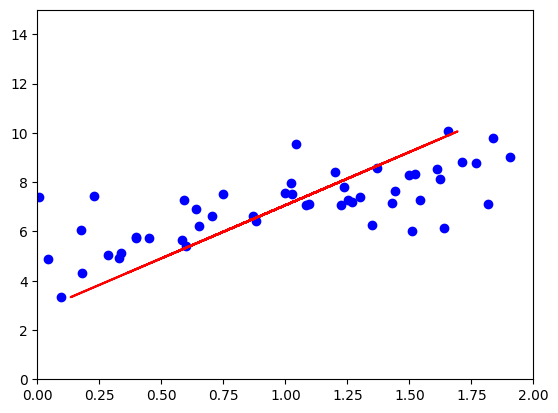

In [96]:
plt.plot(x,y,"bo")
plt.plot(x_out,y,"r")
plt.xlim(0,2)
plt.ylim(0,15)

(0.0, 0.1)

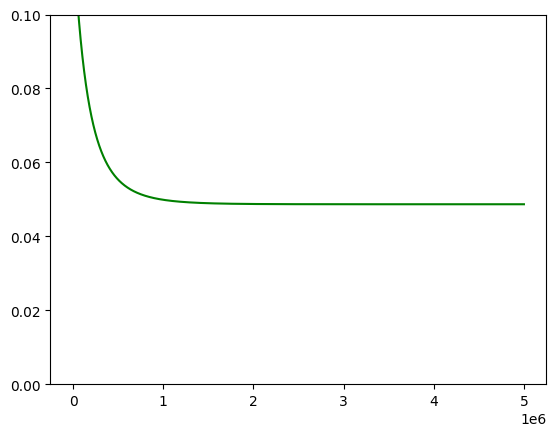

In [98]:
plt.plot(L,"g")
plt.ylim(0,0.1)
#plt.xlim(0,1)

### Implement Polynomial Regression

In [60]:
a=np.random.randn(1)
B=np.random.randn(1)
c=np.random.randn(1)
d=np.random.randn(1)

learning_rate=0.000005
noche=1000000

L1=[]


for i in range(noche):
    a,c= gd2(x,y,a,c,learning_rate,m)
    y_out=hyp2(a,c,x)
    L1.append(cost2(y_out,y))
    
    #if (i%(necho/10))==0:
       # plt.plot(x,y,'bo')
        #plt.plot(x_out,y,'g--')
        #plt.show()
       

(0.0, 11.0)

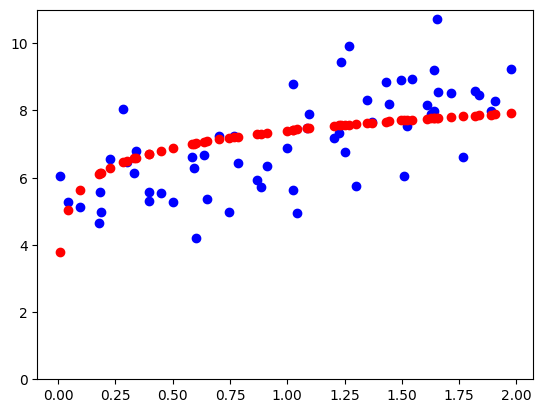

In [75]:
plt.plot(x,y,"bo")
plt.plot(x,y_out,"ro")
plt.ylim(0,11)

(0.0, 70.0)

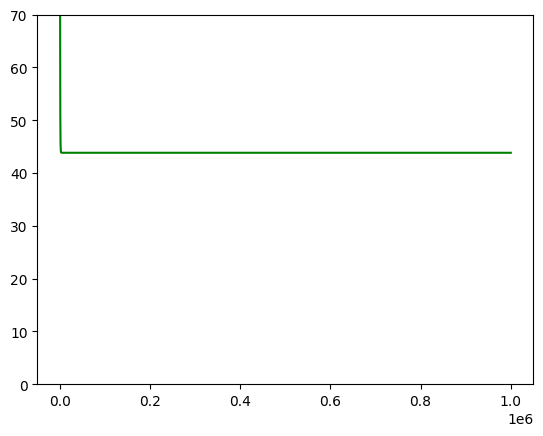

In [74]:
plt.plot(L1,"g")
plt.ylim(0,70)

### Using Scikit

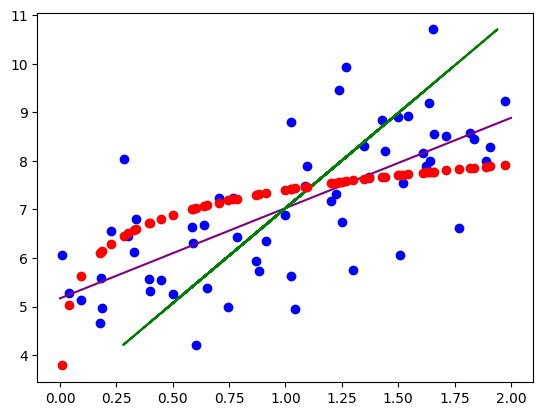

In [73]:
x_train=x.reshape(-1,1)
y_train=y.reshape(-1,1)
from sklearn.linear_model import LinearRegression as LR
regressor=LR()
regressor.fit(x_train,y_train)
inct=regressor.intercept_
coff=regressor.coef_
X=np.linspace(0,2,50).reshape(-1,1)
Y=coff*X+inct
plt.plot(x,y,"bo")
plt.plot(X,Y,"purple")
plt.plot(x_out,y,"g")
plt.plot(x,y_out,"ro")